# Space X Falcon 9 First Stage Landing Prediction



### Objectivs:

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing (allows to standardize the data)
from sklearn import preprocessing

# Splitter (allows to spilt the data into training and testing sets)
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Confusion Matrix Plot Function:

In [25]:
def plot_confusion_matrix(y, y_predict, algo):
    
    algorithms = {0:'LR', 1:'SVM', 2:'DT', 3:'KNN'}
    
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y, y_predict)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Failed to Land', 'Landed'],
                yticklabels=['Failed to Land', 'Landed'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix_{algorithms[algo]}')
    plt.savefig(f'Charts/Confusion_Matrix_{algorithms[algo]}.png')
    plt.show()

## Loading the Dataframe

In [3]:
data = pd.read_csv('dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,Orbit_ES-L1,Orbit_GEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6123.547647,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,5.0,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15600.000000,3.0,5.0,13.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15600.000000,6.0,5.0,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15600.000000,3.0,5.0,12.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [5]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Seri

## 1.

Our **First Task** is going to be creating a numpy array for the column `Class`, then assign it to the `Y` variable.

In [6]:
Y = data['Class'].to_numpy()

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## 2. Standardizing the Data

We're gonna 

In [8]:
transform = preprocessing.StandardScaler()

X = transform.fit(X).transform(X.astype(float))

In [9]:
X[:1]

array([[-1.71291154,  0.        , -0.65391284, -1.57589457, -0.76452913,
         0.79772404, -0.56879646, -0.4108907 , -0.10599979, -0.10599979,
        -0.65465367, -0.10599979, -0.55167728,  3.44342023, -0.18569534,
        -0.33333333, -0.10599979, -0.24253563, -0.42919754, -0.4108907 ,
        -0.15075567, -0.79772404, -0.15075567, -0.39223227,  9.43398113,
        -0.10599979, -0.10599979, -0.10599979, -0.10599979, -0.10599979,
        -0.10599979, -0.10599979, -0.10599979, -0.10599979, -0.10599979,
        -0.10599979, -0.10599979, -0.10599979, -0.10599979, -0.10599979,
        -0.10599979, -0.10599979, -0.10599979, -0.15075567, -0.10599979,
        -0.10599979, -0.10599979, -0.10599979, -0.10599979, -0.15075567,
        -0.10599979, -0.15075567, -0.15075567, -0.10599979, -0.15075567,
        -0.15075567, -0.10599979, -0.10599979, -0.15075567, -0.15075567,
        -0.15075567, -0.10599979, -0.10599979, -0.10599979, -0.15075567,
        -0.21566555, -0.18569534, -0.21566555, -0.2

## 3. Creating a train_test_split function

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [11]:
Y_test.shape

(18,)

## 4. Creating a Logistic Regression Model

In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Creating a logistic Regression Object 
lr = LogisticRegression()

# Creating a GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

logreg_cv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
# Fitting the data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [14]:
print("Tuned Hyperparameters (Best Parameters): ", logreg_cv.best_params_)
print("Best Accuracy: ", logreg_cv.best_score_)

Tuned Hyperparameters (Best Parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy:  0.8464285714285713


## 5. Accuracy Calculating on the Test Data of Logistic Regression

In [15]:
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on Test Data: ", accuracy)

Accuracy on Test Data:  0.8333333333333334


Confusion Matrix

In [16]:
Yhat = logreg_cv.predict(X_test)

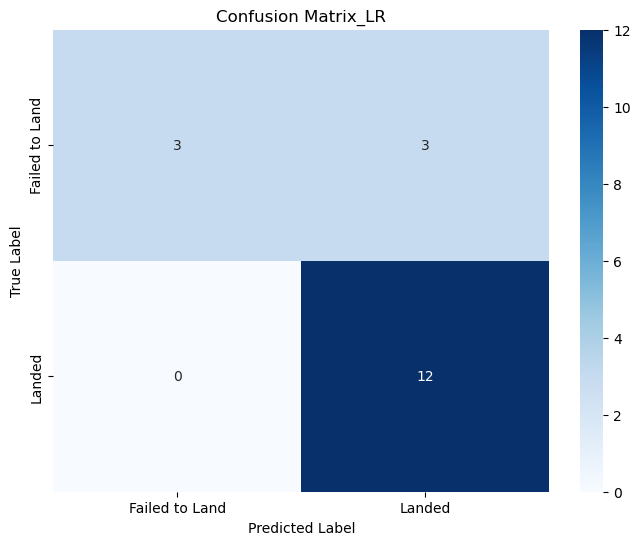

In [26]:
plot_confusion_matrix(Y_test, Yhat, 0)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

## 6. SVM Model Object

In [27]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}


# SVM Object
svm = SVC()

# Creating a GridSearchCV object
svm_cv = GridSearchCV(svm, parameters, cv=10)

In [28]:
# Fitting the data
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [29]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8357142857142856


## 7. Accuracy Calculating on the Test Data of SVM.

In [30]:
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on Test Data: ", accuracy)

Accuracy on Test Data:  0.8333333333333334


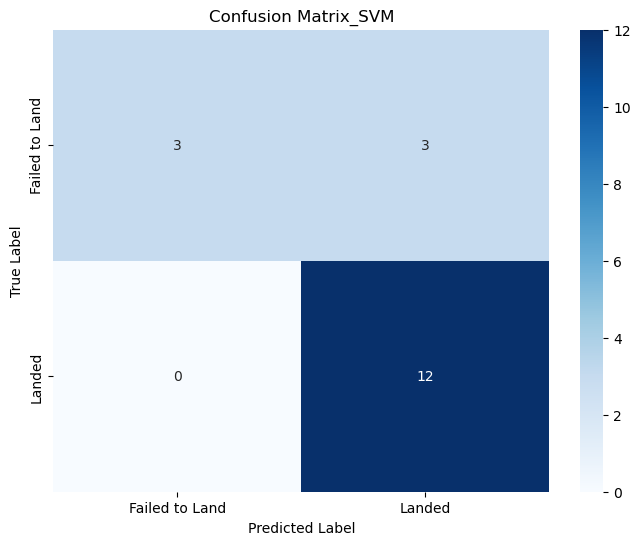

In [31]:
Yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, Yhat, 1)

## 8. Decesion Tree Classifier Algorithm

In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Decesion Tree Object
tree = DecisionTreeClassifier()

# Creating a GridSearchCV object
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [ ]:
# Fitting the Data
tree_cv.fit(X_train, Y_train)

In [34]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9160714285714286


## 9. Accuracy Calculating on the Test Data of Decession Tree.

In [35]:
accuracy = tree_cv.score(X_test, Y_test)
accuracy

0.7222222222222222

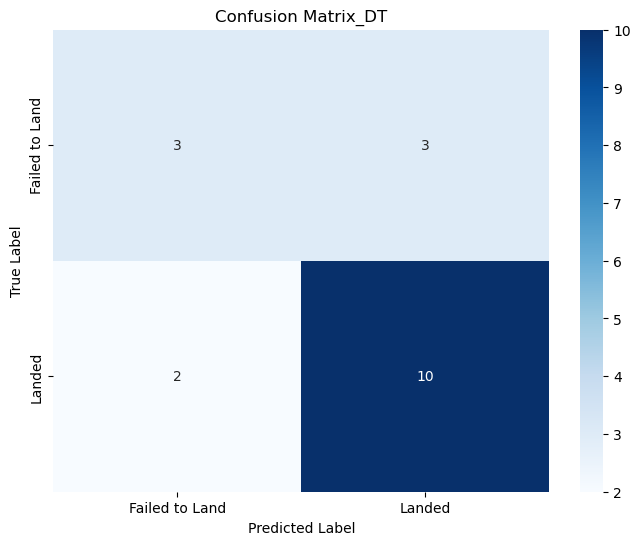

In [36]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, 2)

## 10. K Nearest Neighbor Algorithm

In [37]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# KNN Object
KNN = KNeighborsClassifier()

# GridSearchCV Object
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [ ]:
# Fitting the data
knn_cv.fit(X_train, Y_train)

In [39]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## 11. Accuracy Calculating on the Test Data of KNN.


In [40]:
accuracy = knn_cv.score(X_test, Y_test)
accuracy

0.8333333333333334

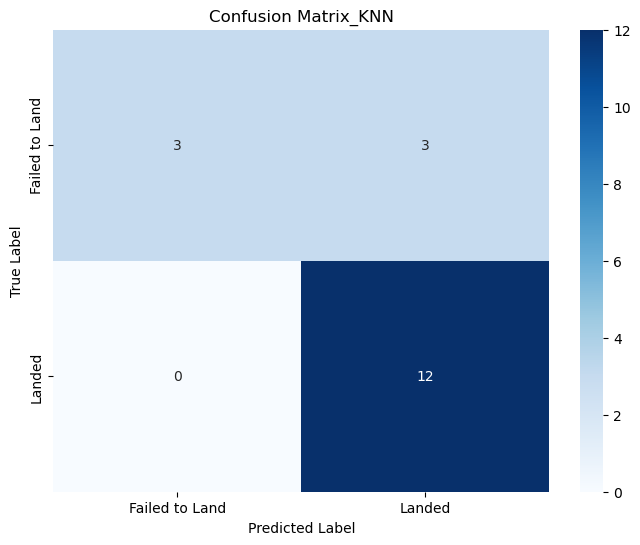

In [41]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, 3)

## 12. Best Model

In [49]:
svm_score = svm_cv.score(X_test, Y_test)
lr_score = logreg_cv.score(X_test, Y_test)
knn_score = knn_cv.score(X_test, Y_test)
dt_score = tree_cv.score(X_test, Y_test)

score_dict = {'SVM': svm_score, 'LR': lr_score, 'KNN': knn_score, 'DT': dt_score}

score_df = pd.DataFrame(list(score_dict.items()), columns=['Model', 'Score'])

score_df

,Model,Score
0,SVM,0.833333
1,LR,0.833333
2,KNN,0.833333
3,DT,0.722222


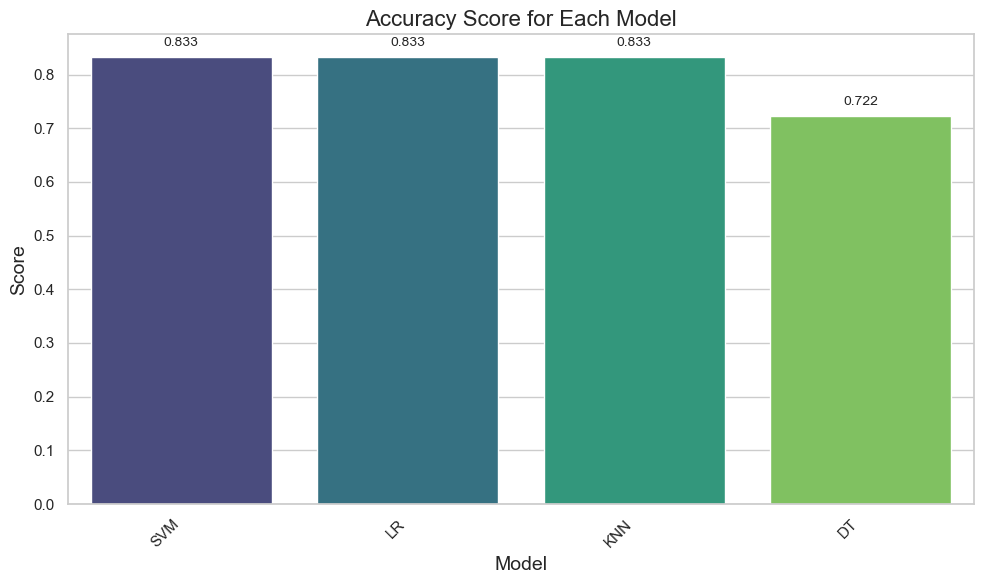

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=score_df, x='Model', y='Score', palette="viridis")

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Set plot title and axis labels
plt.title("Accuracy Score for Each Model", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display and save the plot
plt.tight_layout()
plt.savefig('Charts/accuracy_scores.png')
plt.show()